In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [32]:
d=8
features=2
prefix = f'features={features}/d={d}/'
d2=16
features2=8
prefix2 = f'features={features2}/d={d2}/'
ds = [d,d2]
sep = 'separable'
samples = 10

(202, 5)
[-2.85824527 -0.40767135]
(136, 5)
[-2.18460983  0.0377819 ]


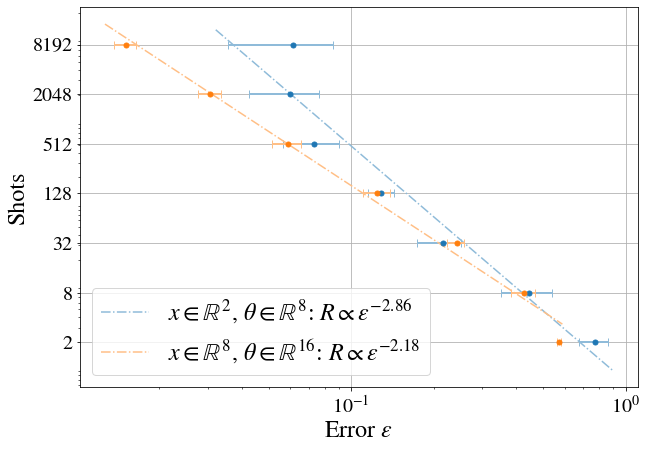

In [33]:
plt.figure(figsize=(10,7))

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]
labels = [r'$x \in \mathbb{R}^2,\, \theta \in \mathbb{R}^8$: ',r'$x \in \mathbb{R}^8,\, \theta \in \mathbb{R}^{16}$: ']
# other constants
lower_percentile = 0.159
upper_percentile = 0.841

for i, pre in enumerate([prefix, prefix2]):
    df = pd.read_csv(f'{pre}spsa_sgd_{sep}.csv')
    print(df.shape)
    shots = list(set(df['Shots']))
    epsilons = np.array([df['Epsilon'][df['Shots'] == R][:samples] for R in shots])
    means = np.mean(epsilons, axis = 1)
    lower = np.quantile(epsilons, lower_percentile, axis=1)
    upper = np.quantile(epsilons, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])
    #plt.scatter(df['Epsilon'],df['Shots'])
    plt.errorbar(means,shots,xerr=errors,marker='.',ecolor=colors_light[i],elinewidth=2.,ls='',capsize=4,color=colors[i],markersize=10)
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    efine = np.linspace(np.min(epsilons),np.max(epsilons))
    plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',color=colors_light[i] ,label=labels[i] + r'$R\propto\varepsilon^{{%.2f}}$'%p[0])

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Shots')
plt.yticks(shots,[int(s) for s in shots])
plt.xlabel(r'Error $\varepsilon$')

plt.legend()
plt.grid()
plt.savefig(f'plots/exponent_{sep}.png',dpi=300,bbox_inches='tight')
